Load packages

In [109]:
import os
# supress tensorflow logging other than errors
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
from tensorflow.contrib.learn import ModeKeys, Estimator

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

/home/fqaiser94/.local/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [8]:
sess = tf.InteractiveSession()

load data 

In [21]:
# first we have to get our data
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz


Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [86]:
dir(mnist)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_fields',
 '_make',
 '_replace',
 '_source',
 'count',
 'index',
 'test',
 'train',
 'validation']

In [87]:
dir(mnist.train)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_epochs_completed',
 '_images',
 '_index_in_epoch',
 '_labels',
 '_num_examples',
 'epochs_completed',
 'images',
 'labels',
 'next_batch',
 'num_examples']

Let's try to understand what the images object is. 

In [98]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

images is a tensor (i.e an n-dimensional array). The tensor has a shape as follows.   

In [99]:
mnist.train.images.shape

(55000, 784)

The first dimension indicate the number of images while the second dimension indicates the  number of pixels in each image.  

Each entry in the tensor is the pixel intensity between 0 and 1, for a particular pixel in a particular image.  

Now let's look at the labels object. 

In [120]:
mnist.train.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

another tensor, no surpise. Let's have a look at its dimensions.  

In [122]:
mnist.train.labels.shape

(55000, 10)

Again, the first dimension (i.e. each row) corresponds to the index of an image. The second dimension indicates the that we have 10 data points (i.e. columns) for each image. These 10 data points are essentially a categorical encoding of the class (or label) of each image (0-9). 

Let's see if we can visualize one of these images and its corresponding label. 

In [116]:
def display_digit(tensor, index):
    
    image = (tensor
             .images[index]
             .reshape([50,50])
             )
    
    label = (tensor
             .labels[index]
             .tolist()
             .index(1)
             )
    
    print('Showing an image of the number %s' % label)
    
    plt.imshow(image, 
               cmap = plt.get_cmap('gray_r'))
    
    plt.show()
    
    plt.savefig('fig.png')

Showing an image of the number 2


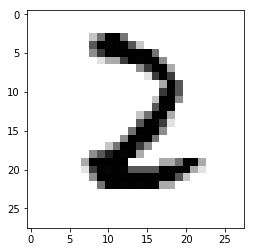

In [114]:
display_digit(tensor=mnist.train, 
              index=np.random.randint(low=0,
                                      high=mnist.train.num_examples)
              )

Excellent, so we have some intuition for our data now.  